## Prediction of house prices based on number of bedroom, number of bathroom.. etc

In [94]:
using CSV
using DataFrames
using PyPlot
using ScikitLearn # machine learning package
using StatsBase
using Random
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"
using Printf

ENV["COLUMNS"] = 500 #display more colums of the DataFrame in the notebook

# (optional)change settings for all plots at once, e.g. font size
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 16

# (optional) change the style. see styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
PyPlot.matplotlib.style.use("seaborn-white")   

# Prediction Model for House prices in King County
     
   
     

![](https://storage.googleapis.com/idx-acnt-gs.ihouseprd.com/AR904063/file_manager/Copied%20Photos/planned_community_425.jpg)



                                                   
     
     
     
     
     
                                     
                                     Winter term class project by :
                                       1. Kofi Oware Sarfo
                                       2. Kingsley Chukwuma Chukwu
     
                             
                             
                                             12/12/2019
       


# Objective

           The  goal of this project is to:
                    -  Nature of the data
                    -  Visualization of data
                    -  Linear regression model
                    -  Predict features with the most impact on pricing
                    
![download.jpeg](https://content.lib.washington.edu/imls/kcsnapshots/images/kc-map.gif)

## Reading in the house price CSV data

In [95]:
df = CSV.read("kc_house_data.csv")
first(df, 7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,Int64,String,Float64,Int64,Float64,Int64,Int64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Int64
1,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
3,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1.225e6,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
7,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


## Checking the number of data

In [96]:
nrow(df)

21613

## Removing data that has missing columns and checking how many datas were removed

In [97]:
dropmissing(df)
nrow(df)

21613

## Putting all the features in an array. This would make it easy to access the feature vector corresponding to a data

In [98]:
#df[0,2]
features = [:bedrooms, :bathrooms, :sqft_living, :sqft_lot, :floors, :waterfront, :view, :condition,:grade, 
    :sqft_above, :sqft_basement, :yr_built, :yr_renovated, :zipcode, :lat, :long, :sqft_living15, :sqft_lot15]

18-element Array{Symbol,1}:
 :bedrooms     
 :bathrooms    
 :sqft_living  
 :sqft_lot     
 :floors       
 :waterfront   
 :view         
 :condition    
 :grade        
 :sqft_above   
 :sqft_basement
 :yr_built     
 :yr_renovated 
 :zipcode      
 :lat          
 :long         
 :sqft_living15
 :sqft_lot15   

## Making sure that the array of features are right

In [99]:
for (i,k) in enumerate(features)
    println(df[1,k])
end

3
1.0
1180
5650
1.0
0
0
3
7
1180
0
1955
0
98178
47.5112
-122.257
1340
5650


## Visualization of some of the feature vectors

In [100]:
mat_1 = PyPlot.matplotlib.cm.get_cmap("Greens")


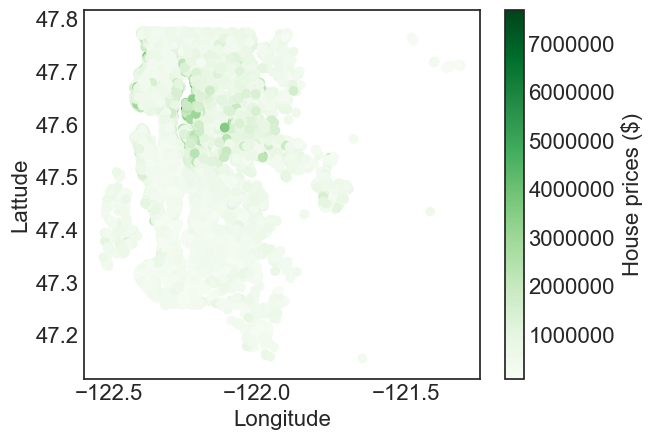

PyObject Text(30.0, 0.5, 'Lattude')

In [101]:
auto_color_2 = mat_1.(range(0.0, stop =0.9, length = 20))
figure()
scatter(df[:,:long], df[:,:lat],c=df[:,:price], cmap=mat_1)
#hist2D(df[:, :long], df[:, :lat],,cmap="Greens", bins=50)
char=colorbar(label="House prices (\$)")
xlabel("Longitude")
ylabel("Lattude")

Key Observations
- price increases as we move  from South to North across the latitude**
- price shows little variation along the longitude**

## Importing the python machine learning Linear Regression Package

In [102]:
@sk_import linear_model : LinearRegression
using ScikitLearn.CrossValidation: train_test_split

## Create the feature matrix x and target vector y for scikitlearn
Feature matrix x has 21613 rows and 18 columns. Each column corresponds to a feature vector
Target vector y contains the house prices

In [103]:
nb_houses = nrow(df)
X = zeros(nb_houses,length(features))
fill!(X,NaN)
y = zeros(nb_houses)
fill!(y,NaN)
k=0
for (h, house) in enumerate(eachrow(df))
    for(f, feature) in enumerate(features)
        X[h,f] = house[feature]
    end
    y[h] = house[:price]
end


## Now we are going to use 80/20 test-train ratio for  the data 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=true)

4-element Array{Array{Float64,N} where N,1}:
 [3.0 1.5 … 1830.0 8168.0; 4.0 3.5 … 1790.0 6000.0; … ; 3.0 2.5 … 3000.0 22302.0; 3.0 3.5 … 3120.0 16440.0]                                                                                                 
 [0.0 1.0 … 2170.0 6000.0; 2.0 1.0 … 990.0 8880.0; … ; 4.0 2.75 … 2270.0 3750.0; 3.0 2.0 … 1300.0 7920.0]                                                                                                   
 [468000.0, 965000.0, 415000.0, 559950.0, 710000.0, 279000.0, 717000.0, 440000.0, 309950.0, 470000.0  …  880000.0, 475000.0, 245500.0, 582000.0, 477000.0, 466800.0, 438000.0, 247000.0, 930000.0, 1.393e6] 
 [228000.0, 198500.0, 489950.0, 446000.0, 491000.0, 625000.0, 269800.0, 385000.0, 555000.0, 672500.0  …  780000.0, 322000.0, 515000.0, 385000.0, 500000.0, 350000.0, 542500.0, 371000.0, 890000.0, 240000.0]

## Fitting the training data to the Linear Regression model

In [121]:
reg = LinearRegression()
reg.fit(X_train, y_train)
println("intercept: ", reg.intercept_)
println("coeff. :", reg.coef_)

intercept: 6.111784038887239e6
coeff. :[-36631.96178055736, 46047.80358212129, 112.0595877457565, 0.13883158581893326, 3962.2037113034494, 623300.4105930288, 54416.647975954875, 26576.295558365546, 95534.20810131724, 71.95440267150468, 40.10518517988894, -2613.2493026573693, 21.07907653959616, -569.359123046931, 603137.7286859063, -208733.21934579822, 17.4134139541666, -0.42429613498041385]


## Testing to the see the score of the model

In [122]:
reg.score(X_test,y_test)

0.6741743855129354

## Calculating the Root Mean Square Error (RMSE) of the predicted house prices. 

In [123]:
#reg.score(X_test,y_test)
#compute predict PM10
ŷ =reg.predict(X_test)
y_test # truth
rmse = sqrt(sum(((ŷ - y_test).^ 2)/length(y_test)))

192215.93500395797

## Visualization of the Predicted house prices vs observed house prices

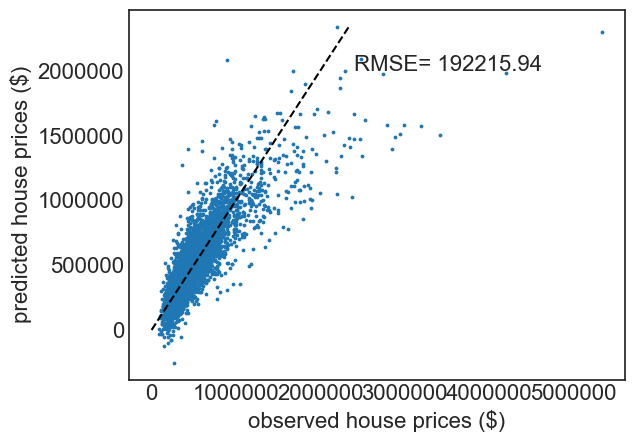

PyObject Text(32.000000000000014, 0.5, 'predicted house prices ($)')

In [124]:
figure()
scatter(y_test,ŷ, s=3)
plot([0,maximum(ŷ)],[0,maximum(ŷ)],color="k", linestyle="--")
text(2400000,2000000, @sprintf("RMSE= %.2f", rmse))
xlabel(L"observed house prices ($)")
ylabel(L"predicted house prices ($)")

## Calculation of the RMSE average for five number of folds

In [125]:

using ScikitLearn.CrossValidation: KFold

K = 5 # number of folds

kf = KFold(nrow(df), n_folds=5, shuffle=true)
avg_rmse = 0
for (train_ids, test_ids) in kf
    reg.fit(X[train_ids, :], y[train_ids])
    y_pred = reg.predict(X[test_ids, :])
    avg_rmse += sqrt(sum(((y_pred - y[test_ids]).^ 2)/length(y[test_ids])))
end
    avg_rmse/=K

println("The RMSE average for $K number of folds is: $avg_rmse")
#ids_train = kf[1][1]
#ids_test = kf[1][2]
#ids_train, ids_test = kf[1]
#ids_train

The RMSE average for 5 number of folds is: 201379.6332524636


## Representing the feature vector id with number

In [126]:
new_feature = zeros(length(features))
for e=1:length(features)
    new_feature[e]=e
end
new_feature

18-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0
 17.0
 18.0

## A data structure to store the features and keep track of the number of features added 

In [127]:
mutable struct Subset_of_feature
    feature_index::Array{Int64, 1}
    length_of_sub::Int64
end
subset = zeros(length(features))

18-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## Function that returns the array of features to trained in the forward step wise selection

In [128]:
function ind_2_choose(sub::Subset_of_feature, numb::Int)
    test = Array{Int64, 1}(undef, (sub.length_of_sub + 1))
    if (sub.length_of_sub!=0)
        for s=1:sub.length_of_sub
            test[s] = sub.feature_index[s]
        end
    end
    test[sub.length_of_sub + 1] = numb
    return test
end

length(new_feature)

18

##  Determination of the features with biggest impact on house prices

We used a forward stepwise selection method to find the best feature vectors.
- this method involves :
let us train a linear model by stepwise addition of features:
<dl>
<dt> y=$β_{0}$  
<dt>y=$β_{0}$+$βx_{1}$
<dt>y=$β_{0}$+$βx_{1}$+$βx_{2}$; 
<dt>y=$β_{0}$+$βx_{1}$+$βx_{2}$+$βx_{3}$;<dt>
       ...
<dt>and assess its accuracy by an 80/20 train/test split.<dt>


In [129]:
new_feature_deep = deepcopy(new_feature)
feature_rmse_z = zeros(length(new_feature))
best_feature_rmse = zeros(length(features))
X_d_train = deepcopy(X_train)
X_d_test = deepcopy(X_test)
subset_of_feature = Subset_of_feature(subset,0)
for s=1:(length(features))
    for z = 1:length(new_feature_deep)
        test = ind_2_choose(subset_of_feature,z)
        X_d_train_f = X_d_train[1:end, test]
        X_d_test_f = X_d_test[1:end, test]
        reg.fit(X_d_train_f, y_train)
        y_d_pred =reg.predict(X_d_test_f)
        feature_rmse_z[z] = sqrt(sum(((y_d_pred - y_test).^ 2)/length(y_test)))
    end
   subset_of_feature.feature_index[s]=new_feature_deep[argmin(feature_rmse_z)]
   subset_of_feature.length_of_sub+=1
   best_feature_rmse[s]=minimum(feature_rmse_z)
   m = argmin(feature_rmse_z)
   new_feature_deep=new_feature_deep[1:end .!=m]
   feature_rmse_z = zeros(length(new_feature_deep))
       
end

best_feature_rmse
subset_of_feature.feature_index

18-element Array{Int64,1}:
  3
 16
 17
 18
 10
 11
 12
 13
 14
 15
  8
  9
  7
  1
  4
  5
  6
  2

## Visualization of the forward stepwise selection 

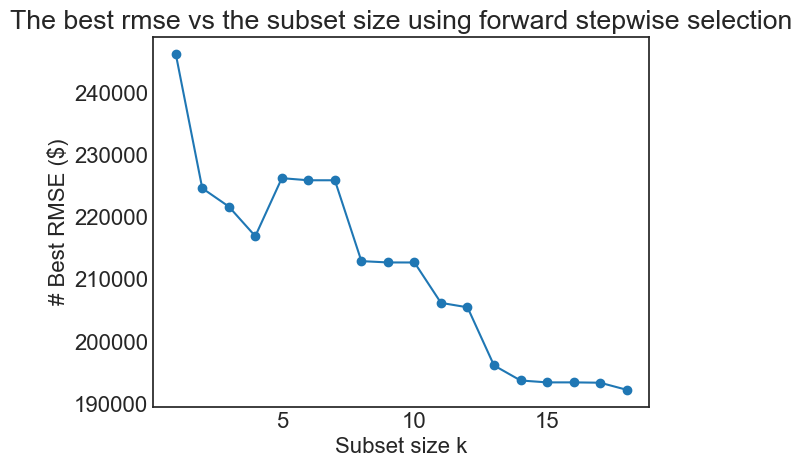

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x142935198>

In [130]:
figure()
ylabel("# Best RMSE (\$)")
xlabel("Subset size k") 
title("The best rmse vs the subset size using forward stepwise selection")
plot(new_feature, best_feature_rmse, marker ="o")

##  Determination of the features with biggest impact on house prices

We used a Backward stepwise selection method to find the best feature vectors.
- this method involves :
        let us train a linear model by stepwise removal of features:
<dl>
<dt>y=$β_{0}$+$βx_{1}$+$βx_{2}$+$βx_{3}$;<dt>
<dt>y=$β_{0}$+$βx_{1}$+$βx_{2}$;
<dt>y=$β_{0}$+$βx_{1}$;
<dt> y=$β_{0}$ 
<dt>and assess its accuracy by an 80/20 train/test split.<dt>

In [131]:
function ind_2_choose_b(sub::Array{Float64,1}, num::Int64)
    test = Array{Int64, 1}(undef, (length(sub)-1))
    kk=0;
    for s=1:length(sub)
        if s!=num
            kk+=1
            test[kk] = sub[s]
        end
    end
    return test
end
new_feature_d = deepcopy(new_feature)
feature_rmse_c = zeros(length(new_feature))
best_feature_rmse_b = zeros(length(features))
X_d_train = deepcopy(X_train)
X_d_test = deepcopy(X_test)
count = 18
subset_of_feature_b = Subset_of_feature(subset,0)
for s=1:(length(features)-1)
    for i = 1:length(new_feature_d)
        test = ind_2_choose_b(new_feature_d, i)
        X_d_train_f = X_d_train[1:end, test]
        X_d_test_f = X_d_test[1:end, test]
        reg.fit(X_d_train_f, y_train)
        y_d_pred =reg.predict(X_d_test_f)
        feature_rmse_c[i] = sqrt(sum(((y_d_pred - y_test).^ 2)/length(y_test)))
    end
  subset_of_feature_b.feature_index[s]=new_feature_d[argmin(feature_rmse_c)]
  subset_of_feature_b.length_of_sub+=1
  best_feature_rmse_b[s]=minimum(feature_rmse_c)
  m = argmin(feature_rmse_c)
  feature_rmse_c = feature_rmse_c[1:end .!=1]
  new_feature_d = new_feature_d[1:end .!=m]
  #println(length(new_feature_d))
    #feature_rmse_c = feature_rmse_c[1:end .!=1]
   #feature_rmse_c = zeros(length(new_feature_d))
    
end
subset_of_feature_b.feature_index[length(features)]=new_feature_d[1]
subset_of_feature_b.length_of_sub+=1
best_feature_rmse_b[length(features)]=feature_rmse_c[1]
subset_of_feature_b.feature_index
#best_feature_rmse_b[1]

18-element Array{Int64,1}:
  2
 10
  4
 18
 13
 11
 17
  5
  8
  1
  6
 16
 14
  7
 15
  3
 12
  9

## Visualization of the backward stepwise selection

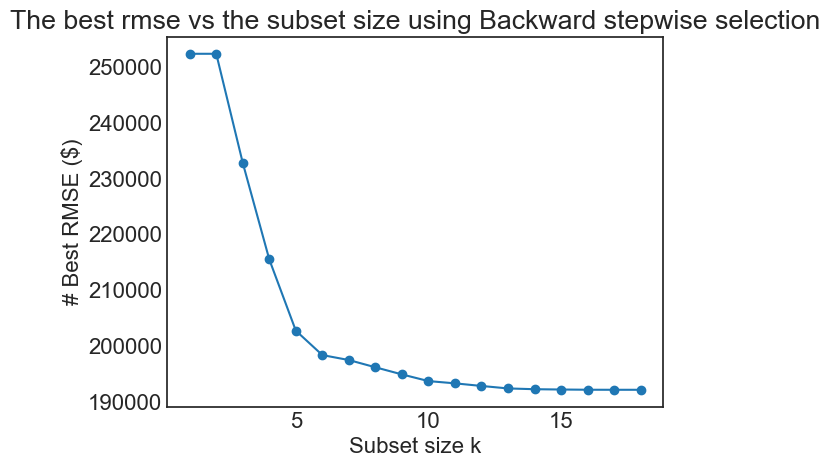

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a46dd3080>

In [132]:
feature_reverse = zeros(length(new_feature))
k = 18
for i = 1:length(new_feature)
    feature_reverse[i]=k
    k-=1
end
figure()
ylabel("# Best RMSE (\$)")
xlabel("Subset size k") 
title("The best rmse vs the subset size using Backward stepwise selection")
plot(feature_reverse, best_feature_rmse_b, marker ="o")


## Printing out the ten best features

In [133]:
function print_out_features(sub_f::Subset_of_feature, sub_b::Subset_of_feature)
    
    println("The top ten feature vectors for the forward and backward stepwise selection")
    @printf("%s %30s\n" ,"Forward","Backward")
    for s=1:10
        @printf("%s %35s\n" ,features[sub_f.feature_index[s]],features[sub_b.feature_index[18-s+1]])
    end
end

print_out_features (generic function with 1 method)

In [134]:
print_out_features(subset_of_feature, subset_of_feature_b)

The top ten feature vectors for the forward and backward stepwise selection
Forward                       Backward
sqft_living                               grade
long                            yr_built
sqft_living15                         sqft_living
sqft_lot15                                 lat
sqft_above                                view
sqft_basement                             zipcode
yr_built                                long
yr_renovated                          waterfront
zipcode                            bedrooms
lat                           condition
